In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from statsmodels.stats import weightstats
import scipy.stats as stats
df = pd.read_csv('Safe Anesthesia and Surgery in Africa.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df.drop('Consent', axis=1, inplace=True)

In [3]:
pd.crosstab(index=df['Profession'], columns=df['Country'], margins=True)

Country,Egypt,Ethiopia,Ghana,Nigeria,South Africa,Tanzania,All
Profession,,,,,,,
Anesthesiologist,4,5,5,5,8,5,32
Clinical Medical Student,10,9,6,7,5,6,43
Clinical Nursing Student,3,5,5,5,3,5,26
Nurse,7,5,5,6,4,5,32
Resident Anesthesiologist,5,9,6,5,5,5,35
Resident Surgeon,3,6,5,6,4,4,28
Surgeon,5,6,5,5,5,5,31
All,37,45,37,39,34,35,227


In [4]:
df.head()

,Gender,Profession,YearsInProf,Country,TeachingHospita,HeardAboutWHOSCC?,AnyOtherSSC,SourceKnowSSC,Know1,Know2,Know3,Know4,Know5,Know6,Know7,Know8,Attitude1,Attitude2,Attitude3,Attitude4,Attitude5,Attitude6,Attitude7,Attitude8,Which of the following surgical checklists do you use in your hospital?,WHO Safe Surgery Checklist in your health facility readily available,Have you ever used the Safe Surgery Checklist in your health facility?,How often do you use the Safe Surgery Checklist?,Who marks the WHO Safe Surgery Checklist?,Have you or anyone in the surgical team ever made any error that could have been prevented with the use of the Safe Surgery Checklist?,How often do you use this surgical safety checklist?,Who marks the surgical safety checklist that is available at your facility?,Have you or any other person in your team ever made any error that could have been prevented with the use of the surgery safety checklist?,AttitOtheSSC1,AttitudeSSC2,AttitudeSSC3,AttitudeSSC4,AttitudeSSC5,AttitudeSSC6,AttitudeSSC7,AttitudeSSC8
0,Male,Clinical Medical Student,4-7 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Male,Clinical Medical Student,4-7 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Female,Clinical Medical Student,above 20 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Male,Clinical Medical Student,0-3 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",Yes,NaN,Colleagues,False,False,True,True,3,Before the patient leaves the operating room,True,True,Strongly Agree,Neutral,Strongly Agree,Neutral,Neutral,Strongly Agree,Strongly Disagree,Strongly Agree,WHO Safe Surgical Checklist,Yes,Yes,Every Surgery,Nurse,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Surgeon,0-3 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",Yes,NaN,Publicity at the hospital;Colleagues,False,False,True,True,4,Before the patient leaves the operating room,True,False,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Disagree,Disagree,Strongly Agree,Strongly Disagree,Agree,WHO Safe Surgical Checklist,Yes,Yes,Some Surgeries,Surgeon,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
pd.crosstab(index=df['HeardAboutWHOSCC?'], columns=df['Profession'], margins=True)

Profession,Anesthesiologist,Clinical Medical Student,Clinical Nursing Student,Nurse,Resident Anesthesiologist,Resident Surgeon,Surgeon,All
HeardAboutWHOSCC?,,,,,,,,
No,1,27,16,8,2,4,1,59
Yes,31,16,10,24,33,24,30,168
All,32,43,26,32,35,28,31,227


In [6]:
16/43

0.37209302325581395

In [7]:
df['Surgical Team Cadre']=df['Profession']

In [8]:
df['Surgical Team Cadre']=df['Surgical Team Cadre'].apply(lambda x: 'Clinical Student' if x=='Clinical Medical Student' or x=='Clinical Nursing Student' else 'Professional Surgical Worker')

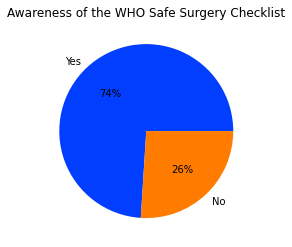

In [9]:
data = [74, 26]
keys = ['Yes', 'No']
  
# declaring exploding pie
explode = [0.1, 0.1]
# define Seaborn color palette to use
palette_color = sbn.color_palette('bright')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
       autopct='%.0f%%')
plt.title('Awareness of the WHO Safe Surgery Checklist')
  
# displaying chart
plt.show()

In [10]:
#Test of statistical significance of Awareness with sociodemographic variables

#Chi Square test to check for significance of Awareness with Gender
ChiAwareGen=np.array([[91, 34], [77, 25]])

#Chi Square test to check for significance of Awareness with Surgical Team Cadre
ChiAwareSTC=np.array([[26, 43], [142, 16]])

#Chi Square test to check for significance of Awareness with Profession
ChiAwareProf=np.array([[16, 27], [10, 16], [24, 8], [33, 2], [24, 4], [31, 1], [30, 1]])

#Chi Square test to check for significance of Awareness with Teaching Hospital
ChiAwareTH=np.array([[33, 6], [28, 7], [26, 19], [22, 15], [34, 3], [25, 9]])

In [11]:
stats.chi2_contingency(ChiAwareSTC)

(65.32535811333089,
 6.349898280795417e-16,
 1,
 array([[ 51.0660793,  17.9339207],
        [116.9339207,  41.0660793]]))

In [12]:
df.head()

,Gender,Profession,YearsInProf,Country,TeachingHospita,HeardAboutWHOSCC?,AnyOtherSSC,SourceKnowSSC,Know1,Know2,Know3,Know4,Know5,Know6,Know7,Know8,Attitude1,Attitude2,Attitude3,Attitude4,Attitude5,Attitude6,Attitude7,Attitude8,Which of the following surgical checklists do you use in your hospital?,WHO Safe Surgery Checklist in your health facility readily available,Have you ever used the Safe Surgery Checklist in your health facility?,How often do you use the Safe Surgery Checklist?,Who marks the WHO Safe Surgery Checklist?,Have you or anyone in the surgical team ever made any error that could have been prevented with the use of the Safe Surgery Checklist?,How often do you use this surgical safety checklist?,Who marks the surgical safety checklist that is available at your facility?,Have you or any other person in your team ever made any error that could have been prevented with the use of the surgery safety checklist?,AttitOtheSSC1,AttitudeSSC2,AttitudeSSC3,AttitudeSSC4,AttitudeSSC5,AttitudeSSC6,AttitudeSSC7,AttitudeSSC8,Surgical Team Cadre
0,Male,Clinical Medical Student,4-7 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student
1,Male,Clinical Medical Student,4-7 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student
2,Female,Clinical Medical Student,above 20 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student
3,Male,Clinical Medical Student,0-3 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",Yes,NaN,Colleagues,False,False,True,True,3,Before the patient leaves the operating room,True,True,Strongly Agree,Neutral,Strongly Agree,Neutral,Neutral,Strongly Agree,Strongly Disagree,Strongly Agree,WHO Safe Surgical Checklist,Yes,Yes,Every Surgery,Nurse,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student
4,Male,Surgeon,0-3 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",Yes,NaN,Publicity at the hospital;Colleagues,False,False,True,True,4,Before the patient leaves the operating room,True,False,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Disagree,Disagree,Strongly Agree,Strongly Disagree,Agree,WHO Safe Surgical Checklist,Yes,Yes,Some Surgeries,Surgeon,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Professional Surgical Worker


Text(0.5, 1.0, 'Source of Awareness of the WHO Safe Surgery Checklist')

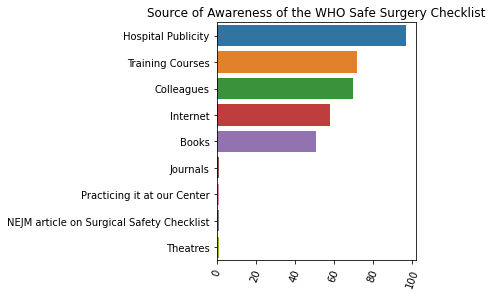

In [13]:
#SOURCE OF AWARENESS OF WHO Safe Surgery Checklist USING A BAR CHART

y_axis = ['Hospital Publicity', 'Training Courses','Colleagues','Internet', 'Books', 'Journals', 'Practicing it at our Center', 'NEJM article on Surgical Safety Checklist', 'Theatres']
x_axis = [97, 72, 70, 58, 51, 1, 1, 1, 1]


sbn.barplot(data=df, x=x_axis, y=y_axis,)
plt.xticks(rotation=70)
plt.tight_layout()
plt.title('Source of Awareness of the WHO Safe Surgery Checklist')

In [14]:
#Knowledge of Respondents of The WHO Safe Surgery Checklist 
df['Know1']=df['Know1'].apply(lambda x: 1 if x==False else 0)
df['Know2']=df['Know2'].apply(lambda x: 1 if x==False else 0)
df['Know3']=df['Know3'].apply(lambda x: 1 if x==True else 0)
df['Know4']=df['Know4'].apply(lambda x: 1 if x==True else 0)
df['Know5']=df['Know5'].apply(lambda x: 1 if x=='3' else 0)
df['Know6']=df['Know6'].apply(lambda x: 1 if x=='Before the patient leaves the operating room' else 0)
df['Know7']=df['Know7'].apply(lambda x: 1 if x==True else 0)
df['Know8']=df['Know8'].apply(lambda x: 1 if x==True else 0)

In [15]:
df['KnowT']=df['Know1']+df['Know2']+df['Know3']+df['Know4']+df['Know5']+df['Know6']+df['Know7']+df['Know8']

In [16]:
df['KnowT'].count()

227

In [66]:
df['KnowT'].mean()

4.960352422907489

In [17]:
df

,Gender,Profession,YearsInProf,Country,TeachingHospita,HeardAboutWHOSCC?,AnyOtherSSC,SourceKnowSSC,Know1,Know2,Know3,Know4,Know5,Know6,Know7,Know8,Attitude1,Attitude2,Attitude3,Attitude4,Attitude5,Attitude6,Attitude7,Attitude8,Which of the following surgical checklists do you use in your hospital?,WHO Safe Surgery Checklist in your health facility readily available,Have you ever used the Safe Surgery Checklist in your health facility?,How often do you use the Safe Surgery Checklist?,Who marks the WHO Safe Surgery Checklist?,Have you or anyone in the surgical team ever made any error that could have been prevented with the use of the Safe Surgery Checklist?,How often do you use this surgical safety checklist?,Who marks the surgical safety checklist that is available at your facility?,Have you or any other person in your team ever made any error that could have been prevented with the use of the surgery safety checklist?,AttitOtheSSC1,AttitudeSSC2,AttitudeSSC3,AttitudeSSC4,AttitudeSSC5,AttitudeSSC6,AttitudeSSC7,AttitudeSSC8,Surgical Team Cadre,KnowT
0,Male,Clinical Medical Student,4-7 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0
1,Male,Clinical Medical Student,4-7 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0
2,Female,Clinical Medical Student,above 20 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0
3,Male,Clinical Medical Student,0-3 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",Yes,NaN,Colleagues,1,1,1,1,1,1,1,1,Strongly Agree,Neutral,Strongly Agree,Neutral,Neutral,Strongly Agree,Strongly Disagree,Strongly Agree,WHO Safe Surgical Checklist,Yes,Yes,Every Surgery,Nurse,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,8
4,Male,Surgeon,0-3 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",Yes,NaN,Publicity at the hospital;Colleagues,1,1,1,1,0,1,1,0,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Disagree,Disagree,Strongly Agree,Strongly Disagree,Agree,WHO Safe Surgical Checklist,Yes,Yes,Some Surgeries,Surgeon,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Professional Surgical Worker,6
5,Female,Clinical Medical Student,4-7 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",Yes,NaN,Publicity at the hospital,1,0,1,1,1,1,1,1,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Strongly Disagree,Agree,WHO Safe Surgical Checklist,No,No,Never,Nurse,Maybe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,7
6,Male,Resident Surgeon,4-7 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",No,Yes,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Every Surgery,Anesthesiologist,No,Strongly Agree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Agree,Strongly Disagree,Agree,Professional Surgical Worker,0
7,Male,Clinical Medical Student,0-3 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0
8,Male,Clinical Medical Student,4-7 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",Yes,NaN,Publicity at the hospital,1,0,1,1,0,0,1,1,Strongly Agree,Strongly Agree,Strongly Agree,Disagree,Disagree,Strongly Agree,Strongly Disagree,Strongly Agree,Modified version of the WHO Safe Surgical Chec...,NaN,NaN,NaN,NaN,NaN,Every Surgery,Nurse,Yes,Strongly Agree,Disagree,Disagree,Disagree,Disagree,Strongly Agree,Strongly Agree,Strongl

In [18]:
#ADDING TWO NEW COLUMNS FOR GOOD AND POOR KNOWLEDGE

df['KnowTGood']=df['KnowT'][df['KnowT']>=5]
df['KnowTPoor']=df['KnowT'][df['KnowT']<=4]

In [19]:
df.head()

,Gender,Profession,YearsInProf,Country,TeachingHospita,HeardAboutWHOSCC?,AnyOtherSSC,SourceKnowSSC,Know1,Know2,Know3,Know4,Know5,Know6,Know7,Know8,Attitude1,Attitude2,Attitude3,Attitude4,Attitude5,Attitude6,Attitude7,Attitude8,Which of the following surgical checklists do you use in your hospital?,WHO Safe Surgery Checklist in your health facility readily available,Have you ever used the Safe Surgery Checklist in your health facility?,How often do you use the Safe Surgery Checklist?,Who marks the WHO Safe Surgery Checklist?,Have you or anyone in the surgical team ever made any error that could have been prevented with the use of the Safe Surgery Checklist?,How often do you use this surgical safety checklist?,Who marks the surgical safety checklist that is available at your facility?,Have you or any other person in your team ever made any error that could have been prevented with the use of the surgery safety checklist?,AttitOtheSSC1,AttitudeSSC2,AttitudeSSC3,AttitudeSSC4,AttitudeSSC5,AttitudeSSC6,AttitudeSSC7,AttitudeSSC8,Surgical Team Cadre,KnowT,KnowTGood,KnowTPoor
0,Male,Clinical Medical Student,4-7 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0,NaN,0.0
1,Male,Clinical Medical Student,4-7 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0,NaN,0.0
2,Female,Clinical Medical Student,above 20 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0,NaN,0.0
3,Male,Clinical Medical Student,0-3 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",Yes,NaN,Colleagues,1,1,1,1,1,1,1,1,Strongly Agree,Neutral,Strongly Agree,Neutral,Neutral,Strongly Agree,Strongly Disagree,Strongly Agree,WHO Safe Surgical Checklist,Yes,Yes,Every Surgery,Nurse,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,8,8.0,NaN
4,Male,Surgeon,0-3 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",Yes,NaN,Publicity at the hospital;Colleagues,1,1,1,1,0,1,1,0,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Disagree,Disagree,Strongly Agree,Strongly Disagree,Agree,WHO Safe Surgical Checklist,Yes,Yes,Some Surgeries,Surgeon,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Professional Surgical Worker,6,6.0,NaN


In [20]:
df['KnowTPoor'].count()

71

In [21]:
pd.crosstab(index=df['Gender'], columns=df['KnowTPoor'], margins=True)

KnowTPoor,0.0,2.0,3.0,4.0,All
Gender,,,,,
Female,25,1,1,6,33
Male,34,0,2,2,38
All,59,1,3,8,71


In [22]:
pd.crosstab(index=df['Profession'], columns=df['KnowTPoor'], margins=True)

KnowTPoor,0.0,2.0,3.0,4.0,All
Profession,,,,,
Anesthesiologist,1,0,0,0,1
Clinical Medical Student,27,0,0,0,27
Clinical Nursing Student,16,0,2,0,18
Nurse,8,1,0,4,13
Resident Anesthesiologist,2,0,0,2,4
Resident Surgeon,4,0,0,2,6
Surgeon,1,0,1,0,2
All,59,1,3,8,71


In [23]:
pd.crosstab(index=df['Surgical Team Cadre'], columns=df['KnowTPoor'], margins=True)

KnowTPoor,0.0,2.0,3.0,4.0,All
Surgical Team Cadre,,,,,
Clinical Student,43,0,2,0,45
Professional Surgical Worker,16,1,1,8,26
All,59,1,3,8,71


In [24]:
pd.crosstab(index=df['TeachingHospita'], columns=df['KnowTPoor'], margins=True)

KnowTPoor,0.0,2.0,3.0,4.0,All
TeachingHospita,,,,,
"Alexandria Main University Hospital, Egypt",15,0,1,3,19
"Inkosi Albert Luthuli Central Hospital, South Africa",9,1,0,0,10
"Kilimanjaro Christian Medical Center, Tanzania",7,0,0,2,9
"Korlebu Teaching Hospital, Ghana",3,0,0,1,4
"Tikur Anbessa Specialized Hospital, Ethiopia",19,0,0,1,20
"University College Hospital, Nigeria",6,0,2,1,9
All,59,1,3,8,71


In [25]:
#Test of statistical significance of Knowledge with sociodemographic variables

#Chi Square test to check for significance of Knowledge with Gender
ChiKnowGen=np.array([[87, 4], [69, 8]])

#Chi Square test to check for significance of Knowledge with Surgical Team Cadre
ChiKnowSTC=np.array([[24, 2], [132, 10]])

#Chi Square test to check for significance of Knowledge with Profession
ChiKnowProf=np.array([[16, 0], [8, 2], [19, 5], [31, 2], [22, 2], [31, 0], [29, 1]])

#Chi Square test to check for significance of Knowledge with Teaching Hospital
ChiKnowTH=np.array([[30, 3], [26, 2], [26, 0], [17, 5], [33, 1], [24, 1]])

In [26]:
stats.chi2_contingency(ChiKnowSTC)

(0.0,
 1.0,
 1,
 array([[ 24.14285714,   1.85714286],
        [131.85714286,  10.14285714]]))

In [27]:
df.head()

,Gender,Profession,YearsInProf,Country,TeachingHospita,HeardAboutWHOSCC?,AnyOtherSSC,SourceKnowSSC,Know1,Know2,Know3,Know4,Know5,Know6,Know7,Know8,Attitude1,Attitude2,Attitude3,Attitude4,Attitude5,Attitude6,Attitude7,Attitude8,Which of the following surgical checklists do you use in your hospital?,WHO Safe Surgery Checklist in your health facility readily available,Have you ever used the Safe Surgery Checklist in your health facility?,How often do you use the Safe Surgery Checklist?,Who marks the WHO Safe Surgery Checklist?,Have you or anyone in the surgical team ever made any error that could have been prevented with the use of the Safe Surgery Checklist?,How often do you use this surgical safety checklist?,Who marks the surgical safety checklist that is available at your facility?,Have you or any other person in your team ever made any error that could have been prevented with the use of the surgery safety checklist?,AttitOtheSSC1,AttitudeSSC2,AttitudeSSC3,AttitudeSSC4,AttitudeSSC5,AttitudeSSC6,AttitudeSSC7,AttitudeSSC8,Surgical Team Cadre,KnowT,KnowTGood,KnowTPoor
0,Male,Clinical Medical Student,4-7 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0,NaN,0.0
1,Male,Clinical Medical Student,4-7 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0,NaN,0.0
2,Female,Clinical Medical Student,above 20 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0,NaN,0.0
3,Male,Clinical Medical Student,0-3 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",Yes,NaN,Colleagues,1,1,1,1,1,1,1,1,Strongly Agree,Neutral,Strongly Agree,Neutral,Neutral,Strongly Agree,Strongly Disagree,Strongly Agree,WHO Safe Surgical Checklist,Yes,Yes,Every Surgery,Nurse,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,8,8.0,NaN
4,Male,Surgeon,0-3 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",Yes,NaN,Publicity at the hospital;Colleagues,1,1,1,1,0,1,1,0,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Disagree,Disagree,Strongly Agree,Strongly Disagree,Agree,WHO Safe Surgical Checklist,Yes,Yes,Some Surgeries,Surgeon,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Professional Surgical Worker,6,6.0,NaN


In [28]:
pd.crosstab(index=df['Know1'], columns='counts', margins=True)

col_0,counts,All
Know1,,
0,78,78
1,149,149
All,227,227


In [29]:
123/168

0.7321428571428571

In [30]:
df.head()

,Gender,Profession,YearsInProf,Country,TeachingHospita,HeardAboutWHOSCC?,AnyOtherSSC,SourceKnowSSC,Know1,Know2,Know3,Know4,Know5,Know6,Know7,Know8,Attitude1,Attitude2,Attitude3,Attitude4,Attitude5,Attitude6,Attitude7,Attitude8,Which of the following surgical checklists do you use in your hospital?,WHO Safe Surgery Checklist in your health facility readily available,Have you ever used the Safe Surgery Checklist in your health facility?,How often do you use the Safe Surgery Checklist?,Who marks the WHO Safe Surgery Checklist?,Have you or anyone in the surgical team ever made any error that could have been prevented with the use of the Safe Surgery Checklist?,How often do you use this surgical safety checklist?,Who marks the surgical safety checklist that is available at your facility?,Have you or any other person in your team ever made any error that could have been prevented with the use of the surgery safety checklist?,AttitOtheSSC1,AttitudeSSC2,AttitudeSSC3,AttitudeSSC4,AttitudeSSC5,AttitudeSSC6,AttitudeSSC7,AttitudeSSC8,Surgical Team Cadre,KnowT,KnowTGood,KnowTPoor
0,Male,Clinical Medical Student,4-7 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0,NaN,0.0
1,Male,Clinical Medical Student,4-7 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0,NaN,0.0
2,Female,Clinical Medical Student,above 20 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0,NaN,0.0
3,Male,Clinical Medical Student,0-3 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",Yes,NaN,Colleagues,1,1,1,1,1,1,1,1,Strongly Agree,Neutral,Strongly Agree,Neutral,Neutral,Strongly Agree,Strongly Disagree,Strongly Agree,WHO Safe Surgical Checklist,Yes,Yes,Every Surgery,Nurse,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,8,8.0,NaN
4,Male,Surgeon,0-3 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",Yes,NaN,Publicity at the hospital;Colleagues,1,1,1,1,0,1,1,0,Strongly Agree,Strongly Disagree,Strongly Agree,Strongly Disagree,Disagree,Strongly Agree,Strongly Disagree,Agree,WHO Safe Surgical Checklist,Yes,Yes,Some Surgeries,Surgeon,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Professional Surgical Worker,6,6.0,NaN


In [31]:
#Attitude of Respondents of The WHO Safe Surgery Checklist 

df['Attitude1'] = df['Attitude1'].replace({
    'Strongly Agree': 1,
    'Agree': 1,
    'Neutral': 0,
    'Disagree': 0,
    'Strongly Disagree': 0
})
df['Attitude2'] = df['Attitude2'].replace({
    'Strongly Disagree': 1,
    'Disagree': 1,
    'Neutral': 0,
    'Agree': 0,
    'Strongly Agree': 0
})
df['Attitude3'] = df['Attitude3'].replace({
    'Strongly Agree': 1,
    'Agree': 1,
    'Neutral': 0,
    'Disagree': 0,
    'Strongly Disagree': 0
})
df['Attitude4'] = df['Attitude4'].replace({
    'Strongly Disagree': 1,
    'Disagree': 1,
    'Neutral': 0,
    'Agree': 0,
    'Strongly Agree': 0
})
df['Attitude5'] = df['Attitude5'].replace({
    'Strongly Disagree': 1,
    'Disagree': 1,
    'Neutral': 0,
    'Agree': 0,
    'Strongly Agree': 0
})
df['Attitude6'] = df['Attitude6'].replace({
    'Strongly Agree': 1,
    'Agree': 1,
    'Neutral': 0,
    'Disagree': 0,
    'Strongly Disagree': 0
})
df['Attitude7'] = df['Attitude7'].replace({
    'Strongly Disagree': 1,
    'Disagree': 1,
    'Neutral': 0,
    'Agree': 0,
    'Strongly Agree': 0
})
df['Attitude8'] = df['Attitude8'].replace({
    'Strongly Agree': 1,
    'Agree': 1,
    'Neutral': 0,
    'Disagree': 0,
    'Strongly Disagree': 0
})

In [32]:
df

,Gender,Profession,YearsInProf,Country,TeachingHospita,HeardAboutWHOSCC?,AnyOtherSSC,SourceKnowSSC,Know1,Know2,Know3,Know4,Know5,Know6,Know7,Know8,Attitude1,Attitude2,Attitude3,Attitude4,Attitude5,Attitude6,Attitude7,Attitude8,Which of the following surgical checklists do you use in your hospital?,WHO Safe Surgery Checklist in your health facility readily available,Have you ever used the Safe Surgery Checklist in your health facility?,How often do you use the Safe Surgery Checklist?,Who marks the WHO Safe Surgery Checklist?,Have you or anyone in the surgical team ever made any error that could have been prevented with the use of the Safe Surgery Checklist?,How often do you use this surgical safety checklist?,Who marks the surgical safety checklist that is available at your facility?,Have you or any other person in your team ever made any error that could have been prevented with the use of the surgery safety checklist?,AttitOtheSSC1,AttitudeSSC2,AttitudeSSC3,AttitudeSSC4,AttitudeSSC5,AttitudeSSC6,AttitudeSSC7,AttitudeSSC8,Surgical Team Cadre,KnowT,KnowTGood,KnowTPoor
0,Male,Clinical Medical Student,4-7 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0,NaN,0.0
1,Male,Clinical Medical Student,4-7 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0,NaN,0.0
2,Female,Clinical Medical Student,above 20 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0,NaN,0.0
3,Male,Clinical Medical Student,0-3 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",Yes,NaN,Colleagues,1,1,1,1,1,1,1,1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,WHO Safe Surgical Checklist,Yes,Yes,Every Surgery,Nurse,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,8,8.0,NaN
4,Male,Surgeon,0-3 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",Yes,NaN,Publicity at the hospital;Colleagues,1,1,1,1,0,1,1,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,WHO Safe Surgical Checklist,Yes,Yes,Some Surgeries,Surgeon,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Professional Surgical Worker,6,6.0,NaN
5,Female,Clinical Medical Student,4-7 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",Yes,NaN,Publicity at the hospital,1,0,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,WHO Safe Surgical Checklist,No,No,Never,Nurse,Maybe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,7,7.0,NaN
6,Male,Resident Surgeon,4-7 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",No,Yes,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Every Surgery,Anesthesiologist,No,Strongly Agree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Agree,Strongly Disagree,Agree,Professional Surgical Worker,0,NaN,0.0
7,Male,Clinical Medical Student,0-3 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0,NaN,0.0
8,Male,Clinical Medical Student,4-7 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",Yes,NaN,Publicity at the hospital,1,0,1,1,0,0,1,1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,Modified version of the WHO Safe Surgical Chec...,NaN,NaN,NaN,NaN,NaN,Every Surgery,Nurse,Yes,Strongly Agree,Disagree,Disagree,Disagree,Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Clinical Student,5,5.0,NaN
9,Male,Nurse,0-3 years,Egypt,"Alexandria Main University Hospital, Egypt",Yes,NaN,Publicity at the hospital;Colleagues,0,1,1,1,1,1,1,1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,WHO Safe Surgical Checklist,Yes,Yes,

In [33]:
pd.crosstab(index=df['Attitude8'], columns='counts', margins=True)

col_0,counts,All
Attitude8,,
0.0,22,22
1.0,146,146
All,168,168


In [34]:
df['AttitudeT']= df['Attitude1']+df['Attitude2']+df['Attitude3']+df['Attitude4']+df['Attitude5']+df['Attitude6']+df['Attitude7']+df['Attitude8']

In [35]:
df.head()

,Gender,Profession,YearsInProf,Country,TeachingHospita,HeardAboutWHOSCC?,AnyOtherSSC,SourceKnowSSC,Know1,Know2,Know3,Know4,Know5,Know6,Know7,Know8,Attitude1,Attitude2,Attitude3,Attitude4,Attitude5,Attitude6,Attitude7,Attitude8,Which of the following surgical checklists do you use in your hospital?,WHO Safe Surgery Checklist in your health facility readily available,Have you ever used the Safe Surgery Checklist in your health facility?,How often do you use the Safe Surgery Checklist?,Who marks the WHO Safe Surgery Checklist?,Have you or anyone in the surgical team ever made any error that could have been prevented with the use of the Safe Surgery Checklist?,How often do you use this surgical safety checklist?,Who marks the surgical safety checklist that is available at your facility?,Have you or any other person in your team ever made any error that could have been prevented with the use of the surgery safety checklist?,AttitOtheSSC1,AttitudeSSC2,AttitudeSSC3,AttitudeSSC4,AttitudeSSC5,AttitudeSSC6,AttitudeSSC7,AttitudeSSC8,Surgical Team Cadre,KnowT,KnowTGood,KnowTPoor,AttitudeT
0,Male,Clinical Medical Student,4-7 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0,NaN,0.0,NaN
1,Male,Clinical Medical Student,4-7 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0,NaN,0.0,NaN
2,Female,Clinical Medical Student,above 20 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0,NaN,0.0,NaN
3,Male,Clinical Medical Student,0-3 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",Yes,NaN,Colleagues,1,1,1,1,1,1,1,1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,WHO Safe Surgical Checklist,Yes,Yes,Every Surgery,Nurse,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,8,8.0,NaN,5.0
4,Male,Surgeon,0-3 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",Yes,NaN,Publicity at the hospital;Colleagues,1,1,1,1,0,1,1,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,WHO Safe Surgical Checklist,Yes,Yes,Some Surgeries,Surgeon,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Professional Surgical Worker,6,6.0,NaN,8.0


In [36]:
pd.crosstab(index=df['Which of the following surgical checklists do you use in your hospital?'], columns='counts', margins=True)

col_0,counts,All
Which of the following surgical checklists do you use in your hospital?,,
Modified version of the WHO Safe Surgical Checklist,47,47
Other surgical checklist,5,5
WHO Safe Surgical Checklist,112,112
We do not use any surgical checklist in my hospital,4,4
All,168,168


In [37]:
df['Which of the following surgical checklists do you use in your hospital?'].count()

168

In [38]:
#ADDING TWO NEW COLUMNS FOR POSITIVE AND NEGATIVE ATTITUDE

df['PosAttitude']=df['AttitudeT'][df['AttitudeT']>=5]
df['NegAttitude']=df['AttitudeT'][df['AttitudeT']<=4]

In [39]:
df

,Gender,Profession,YearsInProf,Country,TeachingHospita,HeardAboutWHOSCC?,AnyOtherSSC,SourceKnowSSC,Know1,Know2,Know3,Know4,Know5,Know6,Know7,Know8,Attitude1,Attitude2,Attitude3,Attitude4,Attitude5,Attitude6,Attitude7,Attitude8,Which of the following surgical checklists do you use in your hospital?,WHO Safe Surgery Checklist in your health facility readily available,Have you ever used the Safe Surgery Checklist in your health facility?,How often do you use the Safe Surgery Checklist?,Who marks the WHO Safe Surgery Checklist?,Have you or anyone in the surgical team ever made any error that could have been prevented with the use of the Safe Surgery Checklist?,How often do you use this surgical safety checklist?,Who marks the surgical safety checklist that is available at your facility?,Have you or any other person in your team ever made any error that could have been prevented with the use of the surgery safety checklist?,AttitOtheSSC1,AttitudeSSC2,AttitudeSSC3,AttitudeSSC4,AttitudeSSC5,AttitudeSSC6,AttitudeSSC7,AttitudeSSC8,Surgical Team Cadre,KnowT,KnowTGood,KnowTPoor,AttitudeT,PosAttitude,NegAttitude
0,Male,Clinical Medical Student,4-7 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0,NaN,0.0,NaN,NaN,NaN
1,Male,Clinical Medical Student,4-7 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0,NaN,0.0,NaN,NaN,NaN
2,Female,Clinical Medical Student,above 20 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0,NaN,0.0,NaN,NaN,NaN
3,Male,Clinical Medical Student,0-3 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",Yes,NaN,Colleagues,1,1,1,1,1,1,1,1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,WHO Safe Surgical Checklist,Yes,Yes,Every Surgery,Nurse,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,8,8.0,NaN,5.0,5.0,NaN
4,Male,Surgeon,0-3 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",Yes,NaN,Publicity at the hospital;Colleagues,1,1,1,1,0,1,1,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,WHO Safe Surgical Checklist,Yes,Yes,Some Surgeries,Surgeon,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Professional Surgical Worker,6,6.0,NaN,8.0,8.0,NaN
5,Female,Clinical Medical Student,4-7 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",Yes,NaN,Publicity at the hospital,1,0,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,WHO Safe Surgical Checklist,No,No,Never,Nurse,Maybe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,7,7.0,NaN,8.0,8.0,NaN
6,Male,Resident Surgeon,4-7 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",No,Yes,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Every Surgery,Anesthesiologist,No,Strongly Agree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Agree,Strongly Disagree,Agree,Professional Surgical Worker,0,NaN,0.0,NaN,NaN,NaN
7,Male,Clinical Medical Student,0-3 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0,NaN,0.0,NaN,NaN,NaN
8,Male,Clinical Medical Student,4-7 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",Yes,NaN,Publicity at the hospital,1,0,1,1,0,0,1,1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,Modified version of the WHO Safe Surgical Chec...,NaN,NaN,NaN,NaN,NaN,Every Surgery,Nurse,Yes,Strongly Agree,Disagree,Disagree,Disagree,Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Clinical Student,5,5.0,NaN,7.0,7.0,NaN
9,Male,Nurse,0-3 years,Egypt,"Alexandria Main University Hosp

In [40]:
pd.crosstab(index=df['Gender'], columns=df['PosAttitude'], margins=True)

PosAttitude,5.0,6.0,7.0,8.0,All
Gender,,,,,
Female,3,7,21,34,65
Male,6,14,22,40,82
All,9,21,43,74,147


In [41]:
#Test of statistical significance of Attitude with sociodemographic variables

#Chi Square test to check for significance of Attitude with Gender
ChiAttitGen=np.array([[82, 9], [65, 12]])

#Chi Square test to check for significance of Attitude with Surgical Team Cadre
ChiAttitSTC=np.array([[23, 3], [124, 18]])

#Chi Square test to check for significance of Attitude with Profession
ChiAttitProf=np.array([[14, 2], [9, 1], [21, 3], [29, 4], [21, 3], [26, 5], [27, 3]])

#Chi Square test to check for significance of Attitude with Teaching Hospital
ChiAttitTH=np.array([[30, 3], [26, 2], [23, 4], [13, 8], [34, 0], [21, 4]])

In [42]:
stats.chi2_contingency(ChiAttitTH)

(18.93299251013537,
 0.001978162167085381,
 5,
 array([[28.875,  4.125],
        [24.5  ,  3.5  ],
        [23.625,  3.375],
        [18.375,  2.625],
        [29.75 ,  4.25 ],
        [21.875,  3.125]]))

In [43]:
df.head()

,Gender,Profession,YearsInProf,Country,TeachingHospita,HeardAboutWHOSCC?,AnyOtherSSC,SourceKnowSSC,Know1,Know2,Know3,Know4,Know5,Know6,Know7,Know8,Attitude1,Attitude2,Attitude3,Attitude4,Attitude5,Attitude6,Attitude7,Attitude8,Which of the following surgical checklists do you use in your hospital?,WHO Safe Surgery Checklist in your health facility readily available,Have you ever used the Safe Surgery Checklist in your health facility?,How often do you use the Safe Surgery Checklist?,Who marks the WHO Safe Surgery Checklist?,Have you or anyone in the surgical team ever made any error that could have been prevented with the use of the Safe Surgery Checklist?,How often do you use this surgical safety checklist?,Who marks the surgical safety checklist that is available at your facility?,Have you or any other person in your team ever made any error that could have been prevented with the use of the surgery safety checklist?,AttitOtheSSC1,AttitudeSSC2,AttitudeSSC3,AttitudeSSC4,AttitudeSSC5,AttitudeSSC6,AttitudeSSC7,AttitudeSSC8,Surgical Team Cadre,KnowT,KnowTGood,KnowTPoor,AttitudeT,PosAttitude,NegAttitude
0,Male,Clinical Medical Student,4-7 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0,NaN,0.0,NaN,NaN,NaN
1,Male,Clinical Medical Student,4-7 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0,NaN,0.0,NaN,NaN,NaN
2,Female,Clinical Medical Student,above 20 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0,NaN,0.0,NaN,NaN,NaN
3,Male,Clinical Medical Student,0-3 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",Yes,NaN,Colleagues,1,1,1,1,1,1,1,1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,WHO Safe Surgical Checklist,Yes,Yes,Every Surgery,Nurse,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,8,8.0,NaN,5.0,5.0,NaN
4,Male,Surgeon,0-3 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",Yes,NaN,Publicity at the hospital;Colleagues,1,1,1,1,0,1,1,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,WHO Safe Surgical Checklist,Yes,Yes,Some Surgeries,Surgeon,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Professional Surgical Worker,6,6.0,NaN,8.0,8.0,NaN


In [44]:
pd.crosstab(index=df['Which of the following surgical checklists do you use in your hospital?'], columns='counts', margins=True)

col_0,counts,All
Which of the following surgical checklists do you use in your hospital?,,
Modified version of the WHO Safe Surgical Checklist,47,47
Other surgical checklist,5,5
WHO Safe Surgical Checklist,112,112
We do not use any surgical checklist in my hospital,4,4
All,168,168


In [45]:
4/168

0.023809523809523808

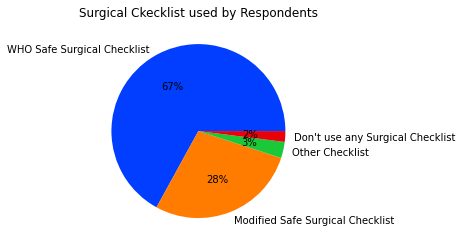

In [46]:
data = [67, 28, 3, 2]
keys = ['WHO Safe Surgical Checklist', 'Modified Safe Surgical Checklist','Other Checklist', "Don't use any Surgical Checklist"]
  
# declaring exploding pie
explode = [0.1, 0.1]
# define Seaborn color palette to use
palette_color = sbn.color_palette('bright')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color,
       autopct='%.0f%%')
plt.title('Surgical Ckecklist used by Respondents')
  
# displaying chart
plt.show()

In [47]:
pd.crosstab(index=df['TeachingHospita'], columns=df['WHO Safe Surgery Checklist in your health facility readily available'], margins=True)

WHO Safe Surgery Checklist in your health facility readily available,No,Yes,All
TeachingHospita,,,
"Alexandria Main University Hospital, Egypt",2,10,12
"Inkosi Albert Luthuli Central Hospital, South Africa",2,10,12
"Kilimanjaro Christian Medical Center, Tanzania",1,12,13
"Korlebu Teaching Hospital, Ghana",0,33,33
"Tikur Anbessa Specialized Hospital, Ethiopia",11,10,21
"University College Hospital, Nigeria",4,17,21
All,20,92,112


In [48]:
20/112

0.17857142857142858

In [49]:
#Test of statistical significance of Availability with sociodemographic variables

#Chi Square test to check for significance of Availability with Gender
ChiAvailGen=np.array([[51, 11], [41, 9]])

#Chi Square test to check for significance of Availability with Surgical Team Cadre
ChiAvailSTC=np.array([[15, 4], [77, 16]])

#Chi Square test to check for significance of Availability with Profession
ChiAvailProf=np.array([[9, 3], [6, 1], [13, 1], [21, 1], [12, 1], [12, 6], [19, 3]])

#Chi Square test to check for significance of Availability with Teaching Hospital
ChiAvailTH=np.array([[17, 4], [12, 1], [10, 11], [10, 2], [33, 0], [10, 2]])

In [50]:
stats.chi2_contingency(ChiAvailTH)

(25.196878483835004,
 0.00012765132412219618,
 5,
 array([[17.25      ,  3.75      ],
        [10.67857143,  2.32142857],
        [17.25      ,  3.75      ],
        [ 9.85714286,  2.14285714],
        [27.10714286,  5.89285714],
        [ 9.85714286,  2.14285714]]))

In [51]:
pd.crosstab(index=df[' How often do you use the Safe Surgery Checklist?'], columns='counts', margins=True)

col_0,counts,All
How often do you use the Safe Surgery Checklist?,,
Every Surgery,37,37
Never,9,9
Some Surgeries,66,66
All,112,112


In [52]:
9/112

0.08035714285714286

In [53]:
pd.crosstab(index=df['Have you or any other person in your team ever made any error that could have been prevented with the use of the surgery safety checklist? '], columns='counts', margins=True)

col_0,counts,All
Have you or any other person in your team ever made any error that could have been prevented with the use of the surgery safety checklist?,,
Maybe,21,21
No,19,19
Yes,27,27
All,67,67


In [54]:
df.head()

,Gender,Profession,YearsInProf,Country,TeachingHospita,HeardAboutWHOSCC?,AnyOtherSSC,SourceKnowSSC,Know1,Know2,Know3,Know4,Know5,Know6,Know7,Know8,Attitude1,Attitude2,Attitude3,Attitude4,Attitude5,Attitude6,Attitude7,Attitude8,Which of the following surgical checklists do you use in your hospital?,WHO Safe Surgery Checklist in your health facility readily available,Have you ever used the Safe Surgery Checklist in your health facility?,How often do you use the Safe Surgery Checklist?,Who marks the WHO Safe Surgery Checklist?,Have you or anyone in the surgical team ever made any error that could have been prevented with the use of the Safe Surgery Checklist?,How often do you use this surgical safety checklist?,Who marks the surgical safety checklist that is available at your facility?,Have you or any other person in your team ever made any error that could have been prevented with the use of the surgery safety checklist?,AttitOtheSSC1,AttitudeSSC2,AttitudeSSC3,AttitudeSSC4,AttitudeSSC5,AttitudeSSC6,AttitudeSSC7,AttitudeSSC8,Surgical Team Cadre,KnowT,KnowTGood,KnowTPoor,AttitudeT,PosAttitude,NegAttitude
0,Male,Clinical Medical Student,4-7 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0,NaN,0.0,NaN,NaN,NaN
1,Male,Clinical Medical Student,4-7 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0,NaN,0.0,NaN,NaN,NaN
2,Female,Clinical Medical Student,above 20 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0,NaN,0.0,NaN,NaN,NaN
3,Male,Clinical Medical Student,0-3 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",Yes,NaN,Colleagues,1,1,1,1,1,1,1,1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,WHO Safe Surgical Checklist,Yes,Yes,Every Surgery,Nurse,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,8,8.0,NaN,5.0,5.0,NaN
4,Male,Surgeon,0-3 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",Yes,NaN,Publicity at the hospital;Colleagues,1,1,1,1,0,1,1,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,WHO Safe Surgical Checklist,Yes,Yes,Some Surgeries,Surgeon,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Professional Surgical Worker,6,6.0,NaN,8.0,8.0,NaN


In [55]:
#Attitude of Respondents to the other Safe Surgery Checklist used in their Hospital 

df['AttitOtheSSC1'] = df['AttitOtheSSC1'].replace({
    'Strongly Agree': 1,
    'Agree': 1,
    'Neutral': 0,
    'Disagree': 0,
    'Strongly Disagree': 0
})
df['AttitudeSSC2'] = df['AttitudeSSC2'].replace({
    'Strongly Disagree': 1,
    'Disagree': 1,
    'Neutral': 0,
    'Agree': 0,
    'Strongly Agree': 0
})
df['AttitudeSSC3'] = df['AttitudeSSC3'].replace({
    'Strongly Disagree': 1,
    'Disagree': 1,
    'Neutral': 0,
    'Agree': 0,
    'Strongly Agree': 0
})
df['AttitudeSSC4'] = df['AttitudeSSC4'].replace({
    'Strongly Disagree': 1,
    'Disagree': 1,
    'Neutral': 0,
    'Agree': 0,
    'Strongly Agree': 0
})
df['AttitudeSSC5'] = df['AttitudeSSC5'].replace({
    'Strongly Disagree': 1,
    'Disagree': 1,
    'Neutral': 0,
    'Agree': 0,
    'Strongly Agree': 0
})
df['AttitudeSSC6'] = df['AttitudeSSC6'].replace({
    'Strongly Agree': 1,
    'Agree': 1,
    'Neutral': 0,
    'Disagree': 0,
    'Strongly Disagree': 0
})
df['AttitudeSSC7'] = df['AttitudeSSC7'].replace({
    'Strongly Disagree': 1,
    'Disagree': 1,
    'Neutral': 0,
    'Agree': 0,
    'Strongly Agree': 0
})
df['AttitudeSSC8'] = df['AttitudeSSC8'].replace({
    'Strongly Agree': 1,
    'Agree': 1,
    'Neutral': 0,
    'Disagree': 0,
    'Strongly Disagree': 0
})

In [56]:
df

,Gender,Profession,YearsInProf,Country,TeachingHospita,HeardAboutWHOSCC?,AnyOtherSSC,SourceKnowSSC,Know1,Know2,Know3,Know4,Know5,Know6,Know7,Know8,Attitude1,Attitude2,Attitude3,Attitude4,Attitude5,Attitude6,Attitude7,Attitude8,Which of the following surgical checklists do you use in your hospital?,WHO Safe Surgery Checklist in your health facility readily available,Have you ever used the Safe Surgery Checklist in your health facility?,How often do you use the Safe Surgery Checklist?,Who marks the WHO Safe Surgery Checklist?,Have you or anyone in the surgical team ever made any error that could have been prevented with the use of the Safe Surgery Checklist?,How often do you use this surgical safety checklist?,Who marks the surgical safety checklist that is available at your facility?,Have you or any other person in your team ever made any error that could have been prevented with the use of the surgery safety checklist?,AttitOtheSSC1,AttitudeSSC2,AttitudeSSC3,AttitudeSSC4,AttitudeSSC5,AttitudeSSC6,AttitudeSSC7,AttitudeSSC8,Surgical Team Cadre,KnowT,KnowTGood,KnowTPoor,AttitudeT,PosAttitude,NegAttitude
0,Male,Clinical Medical Student,4-7 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0,NaN,0.0,NaN,NaN,NaN
1,Male,Clinical Medical Student,4-7 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0,NaN,0.0,NaN,NaN,NaN
2,Female,Clinical Medical Student,above 20 years,Ethiopia,"Tikur Anbessa Specialized Hospital, Ethiopia",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0,NaN,0.0,NaN,NaN,NaN
3,Male,Clinical Medical Student,0-3 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",Yes,NaN,Colleagues,1,1,1,1,1,1,1,1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,WHO Safe Surgical Checklist,Yes,Yes,Every Surgery,Nurse,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,8,8.0,NaN,5.0,5.0,NaN
4,Male,Surgeon,0-3 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",Yes,NaN,Publicity at the hospital;Colleagues,1,1,1,1,0,1,1,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,WHO Safe Surgical Checklist,Yes,Yes,Some Surgeries,Surgeon,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Professional Surgical Worker,6,6.0,NaN,8.0,8.0,NaN
5,Female,Clinical Medical Student,4-7 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",Yes,NaN,Publicity at the hospital,1,0,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,WHO Safe Surgical Checklist,No,No,Never,Nurse,Maybe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,7,7.0,NaN,8.0,8.0,NaN
6,Male,Resident Surgeon,4-7 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",No,Yes,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Every Surgery,Anesthesiologist,No,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Professional Surgical Worker,0,NaN,0.0,NaN,NaN,NaN
7,Male,Clinical Medical Student,0-3 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",No,No,NaN,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clinical Student,0,NaN,0.0,NaN,NaN,NaN
8,Male,Clinical Medical Student,4-7 years,Tanzania,"Kilimanjaro Christian Medical Center, Tanzania",Yes,NaN,Publicity at the hospital,1,0,1,1,0,0,1,1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,Modified version of the WHO Safe Surgical Chec...,NaN,NaN,NaN,NaN,NaN,Every Surgery,Nurse,Yes,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,Clinical Student,5,5.0,NaN,7.0,7.0,NaN
9,Male,Nurse,0-3 years,Egypt,"Alexandria Main University Hospital, Egypt",Yes,NaN,Publicity at the hospital;Colleagues,0,1,1,1,1,1,1,1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,WHO Safe Surgical Checklist,Yes,Yes,Every Surgery,Nu

In [57]:
df['AttitudeSSCT']= df['AttitOtheSSC1']+df['AttitudeSSC2']+df['AttitudeSSC3']+df['AttitudeSSC4']+df['AttitudeSSC5']+df['AttitudeSSC6']+df['AttitudeSSC7']+df['AttitudeSSC8']

In [58]:
#ADDING TWO NEW COLUMNS FOR POSITIVE AND NEGATIVE ATTITUDE

df['PosAttitudeSSC']=df['AttitudeSSCT'][df['AttitudeSSCT']>=5]
df['NegAttitudeSSC']=df['AttitudeSSCT'][df['AttitudeSSCT']<=4]

In [59]:
df['PosAttitudeSSC'].count()

49

In [60]:
df['NegAttitudeSSC'].count()

18

In [61]:
18/67

0.26865671641791045